# Question

Rank days of the week by the number of flights performed by all airlines on that day (1 is the busiest). Output the day of the week names, number of flights and ranks in the rank increasing order.

# Query

```sql
select
    rank() over (order by flight_count desc) as rank_of_day,
    L_WEEKDAYS.Day as Day_name,
    flight_count as Number_of_flights
from (
    select DayOfWeek, count(*) as flight_count
    from al_perf
    group by DayOfWeek
) as flights
join L_WEEKDAYS on flights.DayOfWeek = L_WEEKDAYS.Code
order by number_of_flights desc;
```

# Result

7 rows returned

# Visualization

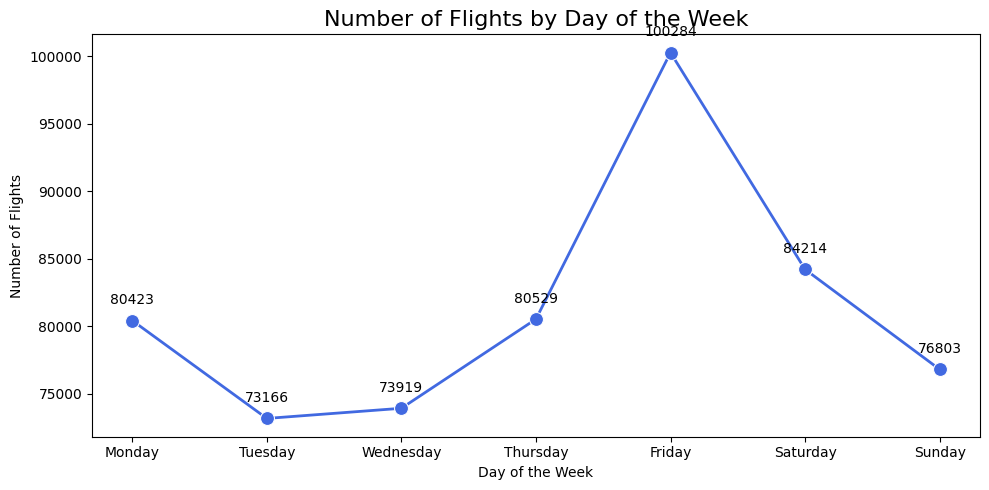

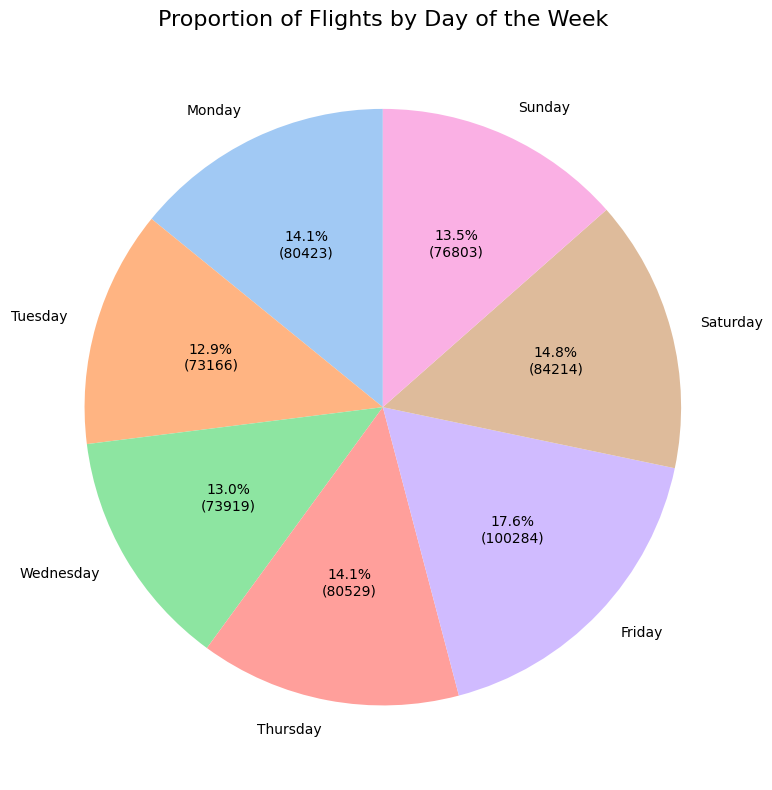

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV data
df = pd.read_csv("../csv/mini_project_<problem3_Mingyang_Han_mh2393>.csv")

# Reorder Day_Name from Monday to Sunday
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["Day_Name"] = pd.Categorical(df["Day_Name"], categories=day_order, ordered=True)
df = df.sort_values("Day_Name")


# 1. Line plot with markers
plt.figure(figsize=(10,5))
sns.lineplot(
    x="Day_Name",
    y="Number_of_flights",
    data=df,
    marker="o",
    markersize=10,
    linewidth=2,
    color="royalblue"
)

# Annotate points
for i, row in df.iterrows():
    plt.text(row["Day_Name"], row["Number_of_flights"] + 1000, 
             f'{row["Number_of_flights"]}', 
             ha='center', va='bottom', fontsize=10)

plt.title("Number of Flights by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Flights")
plt.grid(False)
plt.tight_layout()
plt.show()


# 2. Pie chart showing proportion of flights per day
plt.figure(figsize=(8,8))
plt.pie(
    df["Number_of_flights"], 
    labels=df["Day_Name"], 
    autopct=lambda pct: f"{pct:.1f}%\n({int(round(pct/100.*df['Number_of_flights'].sum()))})",
    startangle=90, 
    colors=sns.color_palette("pastel")
)
plt.title("Proportion of Flights by Day of the Week", fontsize=16)
plt.tight_layout()
plt.show()


# Conclusion

These pictures show the number of flights for each day of the week. Friday has the most flights (100,284), while Tuesday has the fewest (73,166). This trend may be due to business travel being concentrated at the start of the week and leisure travel increasing toward the weekend, resulting in the highest flight numbers on Friday and Saturday.